<a href="https://colab.research.google.com/github/rahuls321/Time-Series-Forecasting-With-Python/blob/master/Identify_and_Remove_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


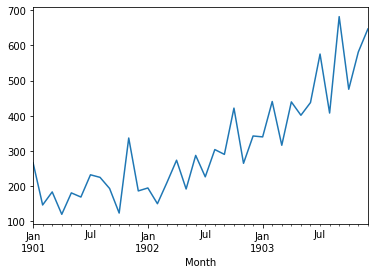

In [12]:
from datetime import datetime
import pandas as pd
from matplotlib import pyplot
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = pd.read_csv('gdrive/My Drive/Colab Notebooks/Forecasting_Datasets/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series.plot()
pyplot.show()

In [13]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

##Detrend By Differencing

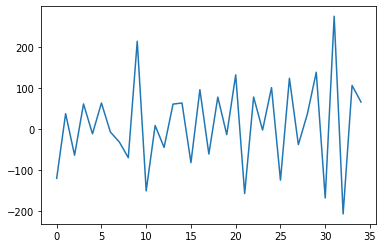

In [14]:
X = series.values
diff = list()
for i in range(1, len(X)):
	value = X[i] - X[i - 1]
	diff.append(value)
pyplot.plot(diff)
pyplot.show()

The above series now called **Trend Stationary**

It works well with linear trend not with quadratic(change in trend also increases or decreases.

##Detrend by Model Fitting

Quadratic trend can be normalized by fitting polynomial curve.

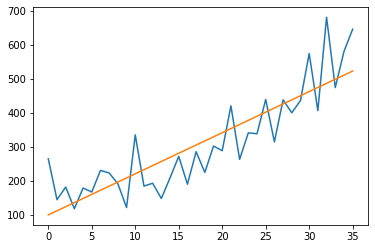

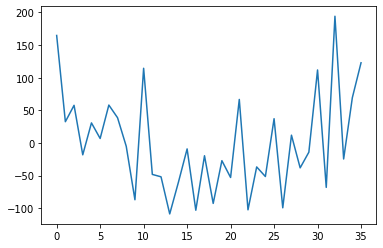

In [15]:
from sklearn.linear_model import LinearRegression
import numpy

# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

Again, we can see that this approach has effectively detrended the dataset. There may be a parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job.

